In [1]:
import json
import os
import csv
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# confirming my working directory.

os.chdir('D:\\My Documents\\Ryerson\\CIND820++\\yelpds')
cwd = os.getcwd()
print(cwd)

D:\My Documents\Ryerson\CIND820++\yelpds


In [4]:
# Reading Reviews JSON file


reviewDF = []
r_dtypes = {"stars": np.float16, 
            "useful": np.int32, 
            "funny": np.int32,
            "cool": np.int32,
           }
with open("yelp_academic_dataset_review.json", "r", encoding='utf-8') as f:
    reader = pd.read_json(f, orient="records", lines=True, 
                          dtype=r_dtypes, chunksize=1000)
        
    for chunk in reader:
        reduced_chunk = chunk.drop(columns=['review_id', 'user_id'])\
                             .query("`date` >= '2017-12-01'")
        reviewDF.append(reduced_chunk)
    
reviewDF = pd.concat(reviewDF, ignore_index=True)

reviewDF.head()

,business_id,stars,useful,funny,cool,text,date
0,xGXzsc-hzam-VArK6eTvtw,1.0,2,0,0,"This place used to be a cool, chill place. Now...",2018-01-21 04:41:03
1,DbXHNl890xSXNiyRczLWAg,5.0,0,0,0,Probably one of the better breakfast sandwiche...,2017-12-02 18:16:13
2,KXCXaF5qimmtKKqnPc_LQA,1.0,0,0,0,Great coffee and pastries. Baristas are excell...,2018-03-03 23:45:25
3,vRrDTIW9IFBO4cc3laazUw,5.0,0,0,0,So sad to learn they are demolishing this. Alw...,2018-03-15 20:34:25
4,VPqWLp9kMiZEbctCebIZUA,3.0,0,0,0,"Overall is good, is worth the line up I don't ...",2018-09-25 03:22:50


In [6]:
reviewDF = reviewDF.drop(columns=["funny", "cool", "date"])

In [7]:
reviewDF.to_csv("reviewDF.csv", index=False)

In [5]:
# Reading the review dataset from a CSV. Hopefully it runs faster than before. 

reviewCSV = pd.read_csv('reviewDF.csv')

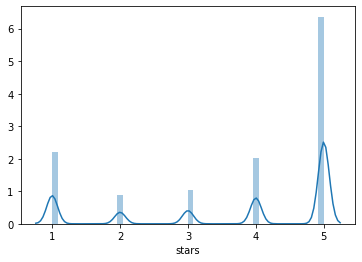

In [12]:
sns.distplot(reviewCSV['stars'])

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);